### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from tensorflow.keras import datasets, layers, models

In [9]:
#fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [10]:
train_images.shape

(50000, 32, 32, 3)

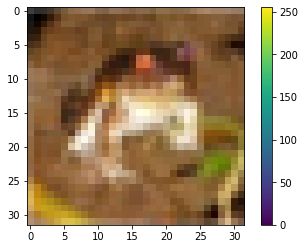

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


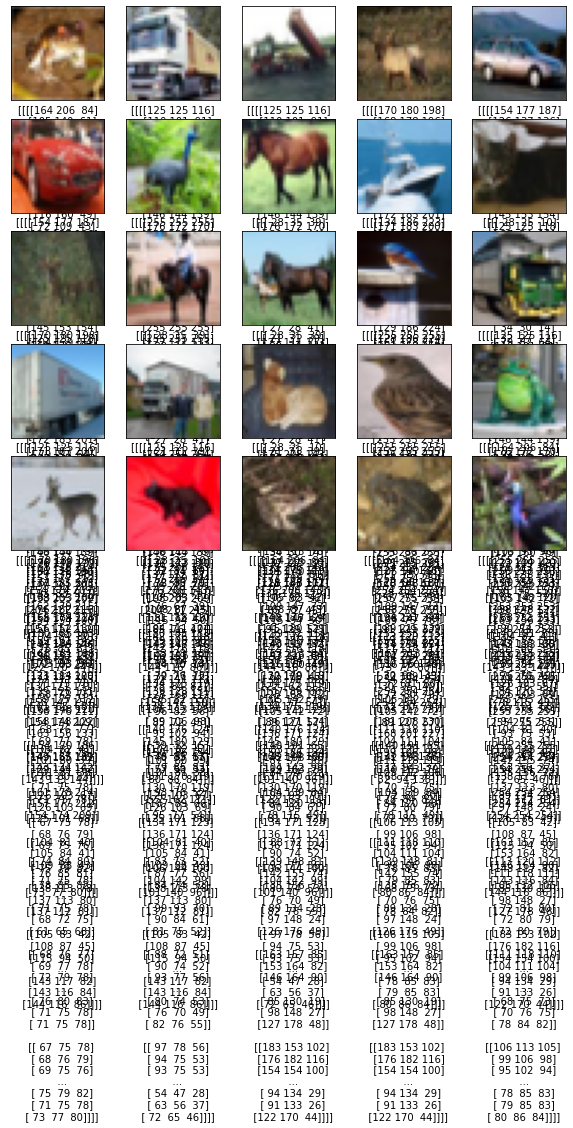

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_images[train_labels[i]])
plt.show()

In [14]:
train_images, test_images = train_images / 255., test_images / 255.

In [15]:
test_images.shape

(10000, 32, 32, 3)

In [16]:
train_images.shape

(50000, 32, 32, 3)

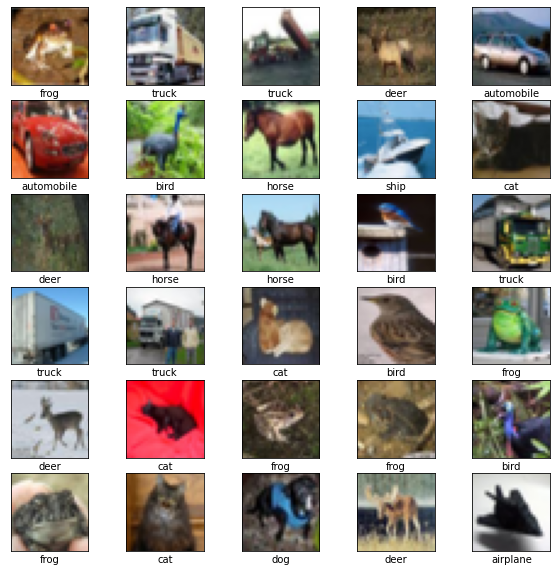

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [18]:
train_images_gs = tf.image.rgb_to_grayscale(train_images)

test_images_gs = tf.image.rgb_to_grayscale(test_images)

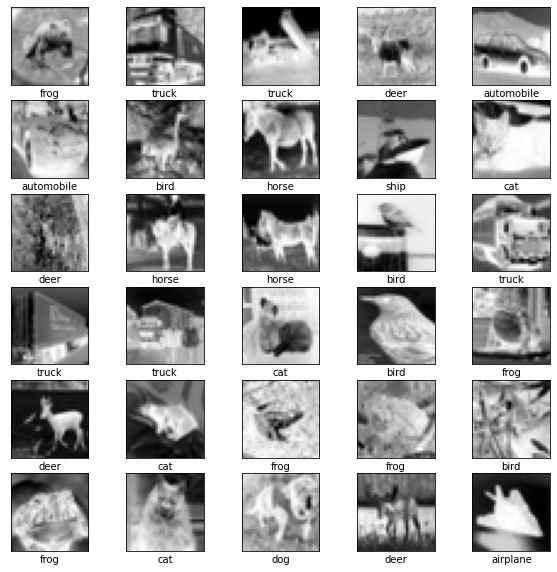

In [20]:
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_gs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [21]:
train_images_gs.shape

TensorShape([50000, 32, 32, 1])

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(filters=8,
                        kernel_size=(3,3),
                        input_shape=(32, 32, 1),
                        padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                65568     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 65,978
Trainable params: 65,978
Non-trainable params: 0
____________________________________________________

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              

In [25]:
model.fit(train_images_gs, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9836 - accuracy: 0.2800
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6384 - accuracy: 0.4230
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5190 - accuracy: 0.4673
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4546 - accuracy: 0.4917
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4014 - accuracy: 0.5099
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3623 - accuracy: 0.5257
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3251 - accuracy: 0.5381
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2965 - accuracy: 0.5481
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2702 - accuracy: 0.5580
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.245

In [26]:
test_loss, test_acc = model.evaluate(test_images_gs,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.3329 - accuracy: 0.5401

Test accuracy: 0.5400999784469604


### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.

In [27]:
model2 = models.Sequential()
model2.add(layers.Conv2D(filters=8,
                        kernel_size=(3,3),
                        input_shape=(32, 32, 3),
                        padding='same'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [29]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 66,122
Trainable params: 66,122
Non-trainable params: 0
__________________________________________________

In [30]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7197 - accuracy: 0.3905
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4514 - accuracy: 0.4901
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3504 - accuracy: 0.5262
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2875 - accuracy: 0.5492
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2431 - accuracy: 0.5663
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2051 - accuracy: 0.5808
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1794 - accuracy: 0.5912
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1578 - accuracy: 0.5956
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1338 - accuracy: 0.6055
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1

In [32]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.1911 - accuracy: 0.5821

Test accuracy: 0.582099974155426
